# Prediction using Unsupervised ML

(Level - Beginner)

* From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
* Use R or Python or perform this task
* Dataset : https://bit.ly/3kXTdox
* Sample Solution : https://bit.ly/3cGyP8j
* Task submission:
    1. Host the code on GitHub Repository (public). Record the code and output in a video. Post the video on YouTube
    2. Share links of code (GitHub) and video (YouTube) as a post on YOUR LinkedIn profile
    3. Submit the LinkedIn link in Task Submission Form when shared.
    
## Import data and libraries

In [1]:
# import all the library required
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

The dataset is 'iris dataset' which can be imported from the scikitlearn directly through ***load_iris()*** or check the [document](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). The dataset is as followed:


In [2]:
# import some data to play with
iris = load_iris()
# put in a dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# show head of the data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Find optimum k
Finding an optimum number of cluster to perform partition clustering such as K-means can be done by many methods. One of the methods is called **'elbow'** which is the point where ***total within-cluster sum of square (WSS)*** of the graph is bended like an elbow considered to be the proper number of cluster.

We will apply elbow method to kmeans using [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) by starting from training kmeans model with each k(number of cluster) and capture the total sum square distance of samples to their closest cluster center. After that, we will plot a graph to find the proper number of cluster

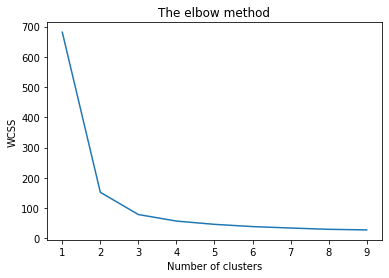

In [3]:
# select value of all data column 
x = df.iloc[:, [0, 1, 2, 3]].values

# finding the optimum number of clusters for k-means classification
# create a list to keep the WSS value
wcss = []

# use range to iterate number of k from 1 to 10
for i in range(1, 10):
    # build kmeans model
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    # fit the model
    kmeans.fit(x)
    # add total sum square of each k using inertia_ attribute
    wcss.append(kmeans.inertia_)
    
# plotting the results to a line graph using elbow method
plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()

Now you can see where the elbow is from the graph above, the optimum number of cluster k is 3 where total sum of square almost drop as a straight line in every iteration. After we got the number of cluster, next we will train kmeans model with this optimum number and plot the graph accordingly.
## Plot the graph

In [4]:
# kmeans clustering with 3 cluster
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
# fit and predict the cluster of data using fit_predict (equivalent to fit function following by predict function)
pred_cluster = kmeans.fit_predict(x)

Plotting the graph showing each cluster in different colors and the centroid of each cluster

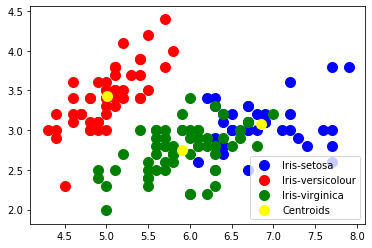

In [5]:
# plotting the clusters
plt.scatter(x[pred_cluster == 0, 0], x[pred_cluster == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[pred_cluster == 1, 0], x[pred_cluster == 1, 1], s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[pred_cluster == 2, 0], x[pred_cluster == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()